# Microsoft Studio Recommendations

### Project Overview

 - Business Understanding
 
 - Conclusion
 
 - Next Steps
 

### Business Understanding

- Microsoft is a 2.25 Trillion company that is looking to create a new film studio to compete with other large companies in the film industry.

### Business Goal 

- Analyze which films were the most successful in theaters globally.
- Provide Microsoft with three film development recommendations to increase profitability of their new movie studio.

### Data Understanding

- tn.movie_budgets.csv.gz provided by The Flatiron School.

- movies_metadata.csv file from The Movies Dataset on Kaggle - https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv

In [145]:
!ls zippedData

bom.movie_gross.csv.gz  im.db.zip               rt.reviews.tsv.gz
credits.csv             movies_metadata.csv     tmdb.movies.csv.gz
im.db                   rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


## Data Analysis

In [146]:
# Import Packages
import pandas as pd
import numpy as np
import sqlite3

### Runtime Data

In [147]:
metadata_df = pd.read_csv('zippedData/movies_metadata.csv')

/Users/jodyharing/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [148]:
metadata_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [149]:
# Replace or drop Null values in 'release_date' to apply methods in next step.
metadata_df['release_date'] = metadata_df['release_date'].fillna('9999') 

In [150]:
# create column for release_date
metadata_df['year_release'] = metadata_df['release_date'].apply(lambda x: x[:4])

In [151]:
metadata_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year_release
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995


In [152]:
# Drop all columns not to be used in analysis 
runtime_df = metadata_df.drop(columns=['belongs_to_collection','homepage','id',
                                            'original_language','overview','popularity',
                                            'poster_path','production_companies',
                                            'production_countries','spoken_languages',
                                            'status','tagline','video','vote_average',
                                            'vote_count','budget','genres','adult'])

In [153]:
runtime_df.head()           # 45,466 rows

,imdb_id,original_title,release_date,revenue,runtime,title,year_release
0,tt0114709,Toy Story,1995-10-30,373554033.0,81.0,Toy Story,1995
1,tt0113497,Jumanji,1995-12-15,262797249.0,104.0,Jumanji,1995
2,tt0113228,Grumpier Old Men,1995-12-22,0.0,101.0,Grumpier Old Men,1995
3,tt0114885,Waiting to Exhale,1995-12-22,81452156.0,127.0,Waiting to Exhale,1995
4,tt0113041,Father of the Bride Part II,1995-02-10,76578911.0,106.0,Father of the Bride Part II,1995


## Total Gross and Release Date Data

In [154]:
gross_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [155]:
gross_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [156]:
# Join gross_df to runtime_df 

merged_df = gross_df.merge(runtime_df, left_on='movie', right_on='title', how='inner')

In [157]:
merged_df.head(1)

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,imdb_id,original_title,release_date_y,revenue,runtime,title,year_release
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt0499549,Avatar,2009-12-10,2.787965e+09,162.0,Avatar,2009


In [158]:
merged_df = merged_df.drop(columns = ['imdb_id','original_title','title'])

In [159]:
merged_df.head(1)         # 5,837 rows in df

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,release_date_y,revenue,runtime,year_release
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009-12-10,2.787965e+09,162.0,2009


In [160]:
# Drop movies before 2000
merged_df = merged_df[(merged_df['year_release'].astype(int)) >= 2000]

In [161]:
# Drop films with less than 45 min runtimes.
merged_df = merged_df[merged_df['runtime'] >= 45]

In [162]:
# Drop columns not using in final analysis
merged_df.drop(['domestic_gross','production_budget','revenue'], axis = 1, inplace=True)

In [163]:
merged_df.head()       # 3,799 rows

,id,release_date_x,movie,worldwide_gross,release_date_y,runtime,year_release
0,1,"Dec 18, 2009",Avatar,"$2,776,345,279",2009-12-10,162.0,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875",2011-05-14,136.0,2011
2,4,"May 1, 2015",Avengers: Age of Ultron,"$1,403,013,963",2015-04-22,141.0,2015
4,10,"Nov 6, 2015",Spectre,"$879,620,923",2015-10-26,148.0,2015
5,11,"Jul 20, 2012",The Dark Knight Rises,"$1,084,439,099",2012-07-16,165.0,2012


In [164]:
# remove '$' and ',' from worldwide_gross
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].str.replace('$','')
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].str.replace(',','').astype(int)

In [166]:
merged_df.dtypes

id                   int64
release_date_x      object
movie               object
worldwide_gross      int64
release_date_y      object
runtime            float64
year_release        object
dtype: object

## Genre Data
 ### movie_basics table
  - has imdb movie_id
  - original_title
  - runtime_minutes
  - start_year
  - genres

In [167]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

In [168]:
q = """
SELECT *
FROM movie_basics
GROUP BY movie_id
;
"""
pd.read_sql(q,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [169]:
# create dataframe with genres for analysis, include primary_title for join 
q = """
SELECT primary_title, genres 
FROM movie_basics
WHERE start_year <= 2018 and start_year >= 2005
ORDER BY start_year
"""
genres = pd.read_sql(q, conn) 

In [170]:
genres

,primary_title,genres
0,Pál Adrienn,Drama
1,So Much for Justice!,History
2,Children of the Green Dragon,Drama
3,The Final Journey,Drama
4,Quantum Quest: A Cassini Space Odyssey,"Adventure,Animation,Sci-Fi"
...,...,...
136697,Hot Scent,Family
136698,"Luz, Câmera e Barreto",Documentary
136699,9/11: Escape from the Towers,Documentary
136700,Wien is 't Hof van Commerce,Comedy


In [171]:
# join genres to merged_df to create genres_df
genres_df = merged_df.merge(genres, left_on='movie', right_on='primary_title', how='inner')

In [172]:
genres_df

,id,release_date_x,movie,worldwide_gross,release_date_y,runtime,year_release,primary_title,genres
0,1,"Dec 18, 2009",Avatar,2776345279,2009-12-10,162.0,2009,Avatar,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1045663875,2011-05-14,136.0,2011,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
2,4,"May 1, 2015",Avengers: Age of Ultron,1403013963,2015-04-22,141.0,2015,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
3,10,"Nov 6, 2015",Spectre,879620923,2015-10-26,148.0,2015,Spectre,"Action,Adventure,Thriller"
4,11,"Jul 20, 2012",The Dark Knight Rises,1084439099,2012-07-16,165.0,2012,The Dark Knight Rises,"Action,Thriller"
...,...,...,...,...,...,...,...,...,...
4399,51,"Apr 21, 2015",Ten,0,2002-05-20,94.0,2002,Ten,"Adventure,Horror,Mystery"
4400,51,"Apr 21, 2015",Ten,0,2002-05-20,94.0,2002,Ten,"Horror,Mystery,Thriller"
4401,56,"Jan 4, 2013",All Superheroes Must Die,0,2011-10-26,78.0,2011,All Superheroes Must Die,"Sci-Fi,Thriller"
4402,67,"Apr 28, 2006",Clean,138711,2004-09-01,111.0,2004,Clean,"Comedy,Drama,Horror"


## Analysis     

In [173]:
import seaborn as sns                   
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use('seaborn-poster')
%matplotlib inline

In [174]:
merged_df.head()

,id,release_date_x,movie,worldwide_gross,release_date_y,runtime,year_release
0,1,"Dec 18, 2009",Avatar,2776345279,2009-12-10,162.0,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1045663875,2011-05-14,136.0,2011
2,4,"May 1, 2015",Avengers: Age of Ultron,1403013963,2015-04-22,141.0,2015
4,10,"Nov 6, 2015",Spectre,879620923,2015-10-26,148.0,2015
5,11,"Jul 20, 2012",The Dark Knight Rises,1084439099,2012-07-16,165.0,2012


## Runtime 
Any film under forty-five minutes is considered a short film and is not included in this analysis, but could be a potential market to explore in the future. Movies over six hours have also been excluded and movies over three and a half hours are their own category in this analysis.

In [175]:
# Drop the 4 outliers for runtime
merged_df = merged_df.drop(
    merged_df['runtime'].sort_values(ascending=False).head(4).index)

In [176]:
print(merged_df['runtime'].max())
print(merged_df['runtime'].min())
print(merged_df['runtime'].median())

338.0
47.0
102.0


### Divide runtimes into 15 minute incremented categories

In [177]:
def categorize_runtimes(x):
    if x < 60:
        return '45-60_min'
    elif x < 75:
        return '60-75_min'
    elif x < 90:
        return '75-90_min'
    elif x < 105:
        return '90-105_min'
    elif x < 120:
        return '105-120_min'
    elif x < 135:
        return '120-135_min'
    elif x < 150:
        return '135-150_min'
    elif x < 165:
        return '150-165_min'
    elif x < 180:
        return '165-180_min'
    elif x < 195:
        return '180-195_min'
    elif x < 210:
        return '195-210_min   '
    else:
        return 'over_210_min'
        

In [178]:
#runtime_median = merged_df['runtime'].median()
merged_df['runtime_categories'] = merged_df['runtime'].apply(categorize_runtimes)

In [179]:
merged_df['runtime_categories'].value_counts()

90-105_min        1525
105-120_min        973
75-90_min          525
120-135_min        467
135-150_min        168
150-165_min         60
165-180_min         28
60-75_min           18
180-195_min         16
over_210_min         9
45-60_min            4
195-210_min          2
Name: runtime_categories, dtype: int64

In [180]:
averages_runtime = merged_df.groupby('runtime_categories').mean().reset_index()
averages_runtime

,runtime_categories,id,worldwide_gross,runtime
0,105-120_min,51.299075,9.533734e+07,110.874615
1,120-135_min,50.374732,1.397845e+08,125.591006
2,135-150_min,46.226190,2.516114e+08,140.357143
3,150-165_min,46.200000,3.019880e+08,156.216667
4,165-180_min,42.000000,2.969748e+08,170.964286
5,180-195_min,50.812500,1.476503e+08,185.062500
6,195-210_min,54.500000,5.714762e+08,200.500000
7,45-60_min,35.750000,1.995375e+08,50.500000
8,60-75_min,46.611111,7.604689e+07,71.888889
9,75-90_min,50.348571,5.727089e+07,84.931429


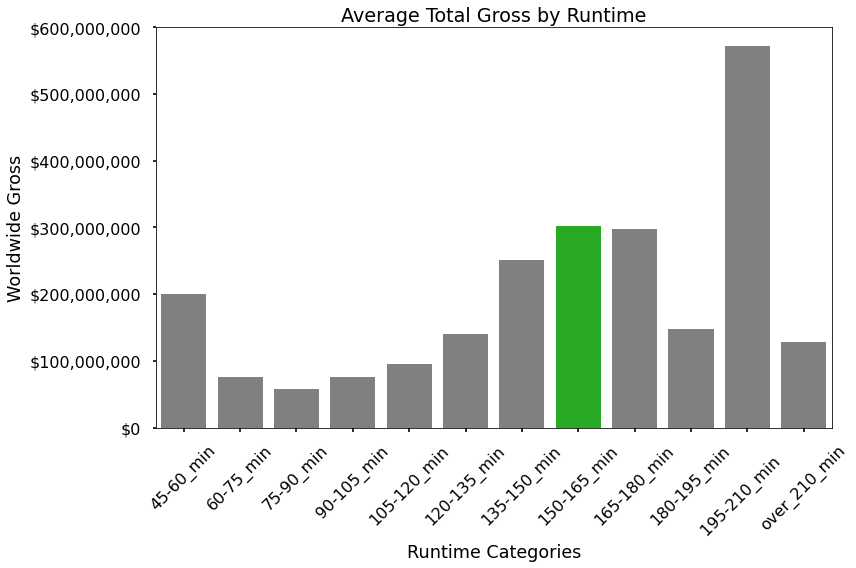

In [181]:
fig, ax = plt.subplots(figsize=(12,8))
color = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', '#15bf0f', 'grey',
         'grey', 'grey', 'grey']
sns.barplot(x='runtime_categories', 
            y='worldwide_gross', 
            data=averages_runtime.reindex([7,8,9,10,0,1,2,3,4,5,6,11]), 
            #color='#15bf0f', 
            palette = color,
            ax=ax)
ax.set(title='Average Total Gross by Runtime', xlabel='Runtime Categories', ylabel="Worldwide Gross")
fmt = '${x:,.0f}'
plt.xticks(rotation=45)
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
fig.tight_layout()

### Why our recommendation is not to make longer films than 180 minutes.
As you can see below there are only two films in the 195-210 minute category.

In [182]:
merged_df.loc[(merged_df['runtime']>195) & (merged_df['runtime']<210)]

,id,release_date_x,movie,worldwide_gross,release_date_y,runtime,year_release,runtime_categories
575,26,"Dec 17, 2003",The Lord of the Rings: The Return of the King,1141403341,2003-12-01,201.0,2003,195-210_min
5509,83,"Sep 16, 2005",Chocolate: Deep Dark Secrets,1549000,2005-09-16,200.0,2005,195-210_min


## Genres

In [183]:
genres_df.head()

,id,release_date_x,movie,worldwide_gross,release_date_y,runtime,year_release,primary_title,genres
0,1,"Dec 18, 2009",Avatar,2776345279,2009-12-10,162.0,2009,Avatar,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1045663875,2011-05-14,136.0,2011,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
2,4,"May 1, 2015",Avengers: Age of Ultron,1403013963,2015-04-22,141.0,2015,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
3,10,"Nov 6, 2015",Spectre,879620923,2015-10-26,148.0,2015,Spectre,"Action,Adventure,Thriller"
4,11,"Jul 20, 2012",The Dark Knight Rises,1084439099,2012-07-16,165.0,2012,The Dark Knight Rises,"Action,Thriller"


In [184]:
genres_df['genres_list'] = genres_df['genres'].str.split(',')

In [185]:
new_genre_df = genres_df.explode('genres_list')

In [186]:
new_genre_df.groupby('genres_list').mean()

,id,worldwide_gross,runtime
genres_list,,,
Action,48.299419,1.634934e+08,110.827035
Adventure,48.807256,2.810169e+08,109.975057
Animation,48.875000,3.009579e+08,97.912500
Biography,49.857143,8.084608e+07,114.203008
Comedy,51.030230,1.018386e+08,103.205562
Crime,48.220049,6.571675e+07,105.882641
Documentary,50.287248,8.392052e+07,104.904698
Drama,49.918123,6.973662e+07,109.125115
Family,52.613027,1.773701e+08,103.363985


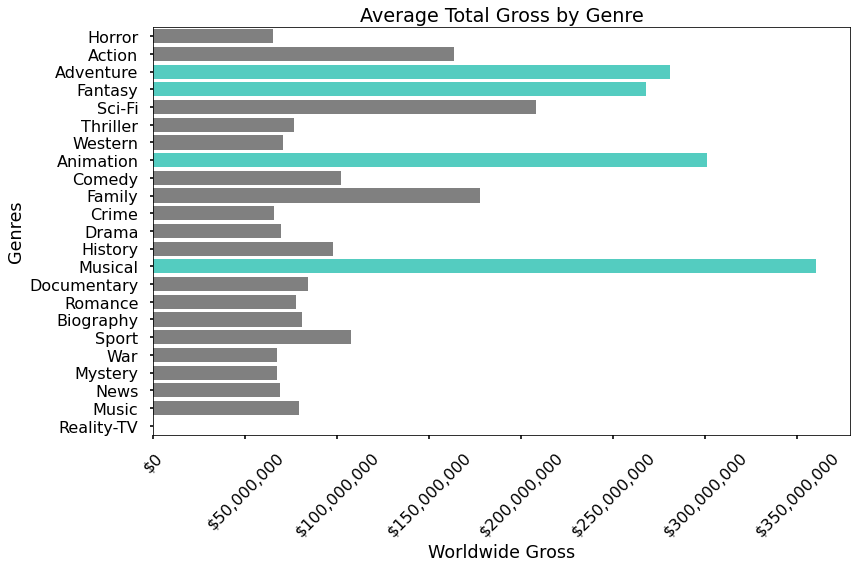

In [187]:
fig, ax = plt.subplots(figsize=(12,8))
color = ['grey', 'grey', 'turquoise', 'turquoise', 'grey', 'grey', 'grey', 'turquoise', 'grey',
         'grey', 'grey', 'grey', 'grey', 'turquoise', 'grey', 'grey', 'grey', 'grey', 
         'grey', 'grey', 'grey','grey', 'grey']

sns.barplot(y='genres_list', 
            x='worldwide_gross', 
            data= new_genre_df, 
            #color='grey', 
            palette = color,
            ax=ax,
            ci=None)
ax.set(title='Average Total Gross by Genre', xlabel='Worldwide Gross', ylabel="Genres")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)

fig.tight_layout()

## Month Release 

In [188]:
# Create a column that is a datetime object, 'release_date'
merged_df['release_date'] = pd.to_datetime(merged_df['release_date_y'])

In [189]:
# Create new column 'month_release'
merged_df['month_release'] = merged_df['release_date'].dt.month

In [190]:
merged_df.head(2)

,id,release_date_x,movie,worldwide_gross,release_date_y,runtime,year_release,runtime_categories,release_date,month_release
0,1,"Dec 18, 2009",Avatar,2776345279,2009-12-10,162.0,2009,150-165_min,2009-12-10,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,1045663875,2011-05-14,136.0,2011,135-150_min,2011-05-14,5


In [191]:
ave_month_gross_df = merged_df.groupby('month_release').mean().reset_index()

In [192]:
ave_month_gross_df

,month_release,id,worldwide_gross,runtime
0,1,50.523659,4.881467e+07,99.570978
1,2,50.628159,9.324455e+07,104.776173
2,3,49.530547,9.835046e+07,104.646302
3,4,50.604096,9.802642e+07,104.805461
4,5,50.468635,1.470482e+08,109.439114
5,6,48.132841,1.788910e+08,105.546125
6,7,50.856061,1.408824e+08,105.068182
7,8,51.015576,7.518782e+07,104.834891
8,9,49.818000,5.181822e+07,106.538000
9,10,50.930233,7.162807e+07,105.764858


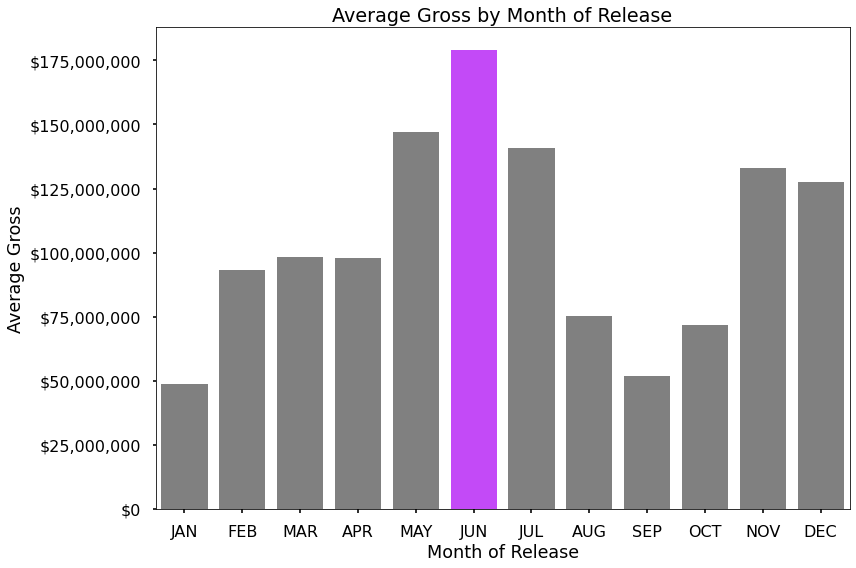

In [193]:
fig, ax = plt.subplots(figsize=(12,8))

bar = sns.barplot(data = ave_month_gross_df, 
                  x='month_release', 
                  y='worldwide_gross', 
                  color='grey')

ax.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
ax.set(title='Average Gross by Month of Release', xlabel='Month of Release', ylabel="Average Gross")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

# Change color of tallest bar
patch_h = []    
for patch in bar.patches:
    reading = patch.get_height()
    patch_h.append(reading)
# np.argmax return the index of largest value of the list
idx_tallest = np.argmax(patch_h)   
bar.patches[idx_tallest].set_facecolor('#c34af7')  #a834a8

fig.tight_layout()

## Next Steps
- Analyze the short film market.
- Explore budget and costs of making a film. 